## Списки

Вам дан список. Поменяйте порядок следования элементов, начиная с середины до конца списка.

In [300]:
# ваше решение
a = [i for i in range(10)]
print(a)
a[len(a) // 2:] = a[len(a):len(a) // 2 - 1:-1]
print(a)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 9, 8, 7, 6, 5]


Вам дан список. Поменяйте в нём местами блоки элементов: каждый чётный со второго по пятый с каждым нечётым со второго по пятый с конца. 

In [301]:
# ваше решение
a = [i for i in range(20)]
a[2:6:2], a[-2:-6:-2] = a[-2:-6:-2], a[2:6:2]
a

[0, 1, 18, 3, 16, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 4, 17, 2, 19]

## Генераторы

Вам дан список. Создайте новый список, который возведёт в квадрат элементы исходного списка.

In [302]:
# ваше решение
a = [i for i in range(10)]
b = [x**2 for x in a]
print(a)
print(b)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


Вам дан список. Создайте новый список, который вычитает из каждого элемента списка пять. 

In [303]:
# ваше решение
a = [i for i in range(10)]
b = [x - 5 for x in a]
print(a)
print(b)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4]


## Встроенные функции

Вам дана строка. Выведите разницу между наибольшим и наименьшим ascii-кодом символа в строке. 

In [304]:
# ваше решение
s = "xabacabax"
abs(ord(min(s)) - ord(max(s)))

23

Вам дана строка. Выведите отсортированную строку, приведённую к верхнему регистру. 

In [305]:
# ваше решение
s = "abracadabra"
s = s.upper()
l = list(s)
l.sort()
print("".join(l))

AAAAABBCDRR


## NumPy

Вам дан одномерный массив. На основе этого массива сгенерируйте двумерный массив, который группирует по 4 элемента в строку из исходного.

Размерность исходного массива кратна 4.

Например:

`A = [1,2,3,4,5]` - исходный массив

`B = [[1,2,3,4],[2,3,4,5]]` - полученный

In [306]:
# ваше решение
import numpy as np
n = 2
A = np.array([1, 2, 3, 4, 5, 6, 7, 8] * n)
B = np.array([[A[i] for i in range(0 + (j*4), 4 + (j*4))] for j in range(len(A) // 4)])
B

array([[1, 2, 3, 4],
       [5, 6, 7, 8],
       [1, 2, 3, 4],
       [5, 6, 7, 8]])

Дан массив числе одномерный


Создайте двумерный массив, где строка это бинарное представление числа из исходного.

Например:
`A = [0, 1, 2]` - исходный массив

`B = [[0 0 0 0 0 0 0 0]
     [0 0 0 0 0 0 0 1]
     [0 0 0 0 0 0 1 0]]` - полученный

In [307]:
# ваше решение
A = np.array([0, 1, 2, 5, 6, 255])
k = len(bin(max(A))) - 2
B = np.array([[('0' * (8 - len(bin(A[i])[2:]))) + bin(A[i])[2:]] for i in range(len(A))])
B

array([['00000000'],
       ['00000001'],
       ['00000010'],
       ['00000101'],
       ['00000110'],
       ['11111111']], dtype='<U8')

## Pandas

https://www.kaggle.com/datasets/muhammetvarl/laptop-price

- Какие типы данных присутствуют в датасете?
- Есть ли в датасете пропущенные значения? Если да, то сколько и где?
- Очистите переменные: например `Ram` от Gb (сделав ее числовой), `ScreenResolution` создайте две колонки, например, ширина отдельно и длинна отдельно (тем самым сделав ее числовой), разделите колонку `Cpu` отдельно на тип процессора и отдельно на часототу, и так далее.
- Постройте heatmap для матрицы корреляции числовых переменных в датасете.
- Постройте pairplot для всех переменных.
- Постройте boxplot для всех переменных и выведете объекты которые являются выбросами (строки из датафрейма).
- Постройте гистраграмму переменной `Company`.

In [308]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

data = pd.read_csv("laptop_price.csv", encoding='latin-1')
print(data.dtypes)
print(data[data.isna().any(axis=1)])

laptop_ID             int64
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object
Empty DataFrame
Columns: [laptop_ID, Company, Product, TypeName, Inches, ScreenResolution, Cpu, Ram, Memory, Gpu, OpSys, Weight, Price_euros]
Index: []


In [309]:
data["Ram"] = data["Ram"].apply(lambda x: int(x.replace('GB', '')))
data['Weight'] = data["Weight"].apply(lambda x: float(str(x).replace('kg', '')))
resolutions = data["ScreenResolution"].apply(lambda x: x.split(' '))
data['ScreenWidth'] = [w[-1].split('x')[0] for w in resolutions]
data['ScreenHeight'] = [h[-1].split('x')[1] for h in resolutions]

def f(s):
    s = s.split()[0]
    if 'TB' in s:
        return float(s.replace('TB', '')) * 1024
    return float(s.replace('GB', ''))

data['Memory'] = data['Memory'].apply(f)
cpu = data['Cpu'].apply(lambda x : x.split())
data['Frequency'] = [float(str(freq[-1]).replace('GHz', '')) for freq in cpu]
data = data.drop(columns=['ScreenResolution', 'Cpu'])
data

,laptop_ID,Company,Product,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,ScreenWidth,ScreenHeight,Frequency
0,1,Apple,MacBook Pro,Ultrabook,13.3,8,128.0,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560,1600,2.3
1,2,Apple,Macbook Air,Ultrabook,13.3,8,128.0,Intel HD Graphics 6000,macOS,1.34,898.94,1440,900,1.8
2,3,HP,250 G6,Notebook,15.6,8,256.0,Intel HD Graphics 620,No OS,1.86,575.00,1920,1080,2.5
3,4,Apple,MacBook Pro,Ultrabook,15.4,16,512.0,AMD Radeon Pro 455,macOS,1.83,2537.45,2880,1800,2.7
4,5,Apple,MacBook Pro,Ultrabook,13.3,8,256.0,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560,1600,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,128.0,Intel HD Graphics 520,Windows 10,1.80,638.00,1920,1080,2.5
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,512.0,Intel HD Graphics 520,Windows 10,1.30,1499.00,3200,1800,2.5
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,64.0,Intel HD Graphics,Windows 10,1.50,229.00,1366,768,1.6
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,1024.0,AMD Radeon R5 M330,Windows 10,2.19,764.00,1366,768,2.5


/tmp/ipykernel_7916/3316939329.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<AxesSubplot: >

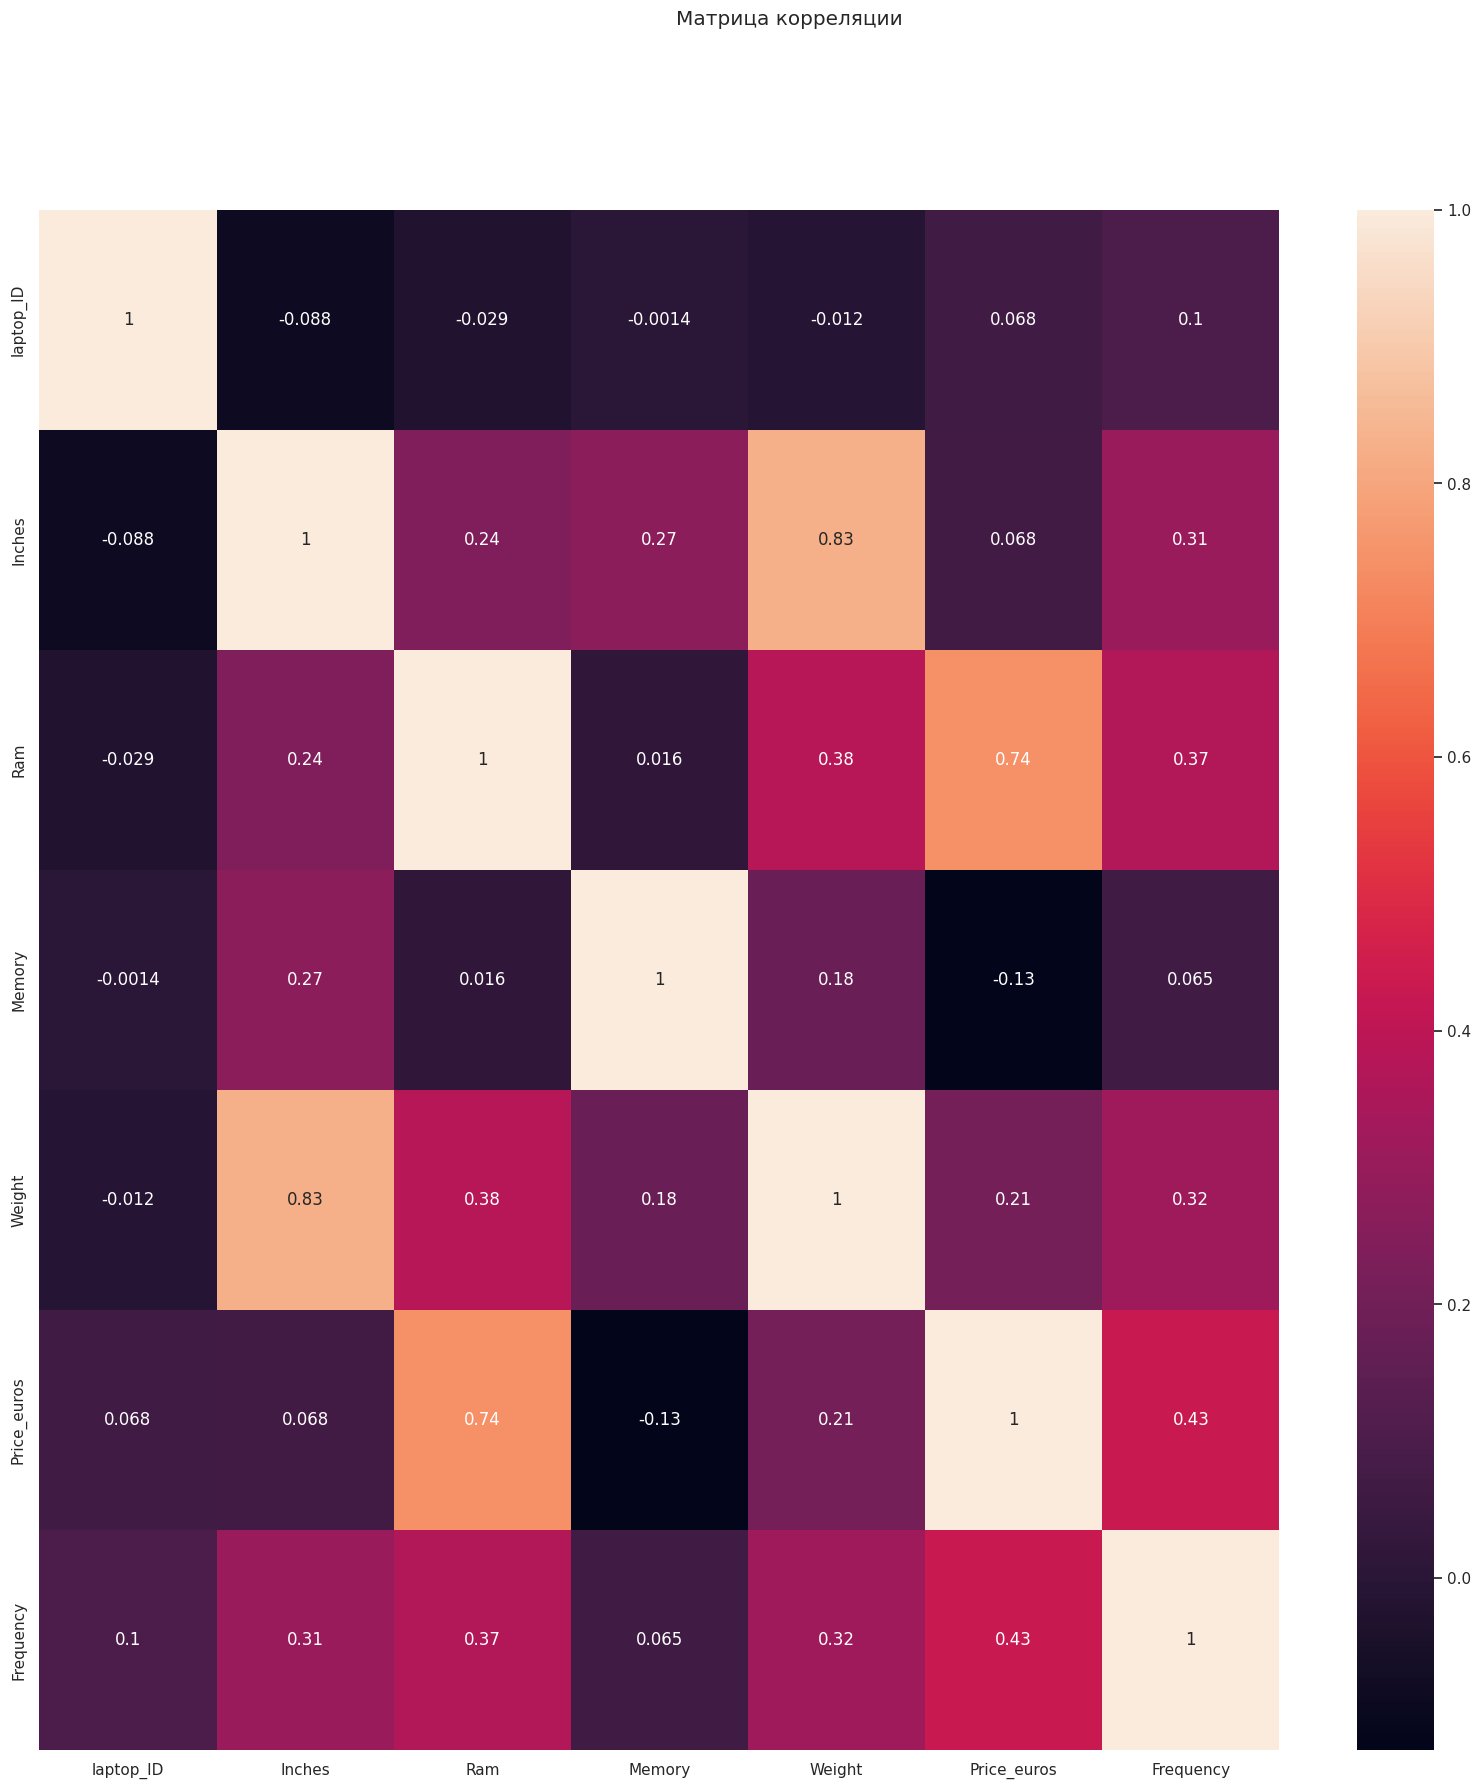

In [325]:

plt.figure(figsize=(20, 20)).suptitle("Матрица корреляции")
sns.heatmap(data.corr(), annot=True)

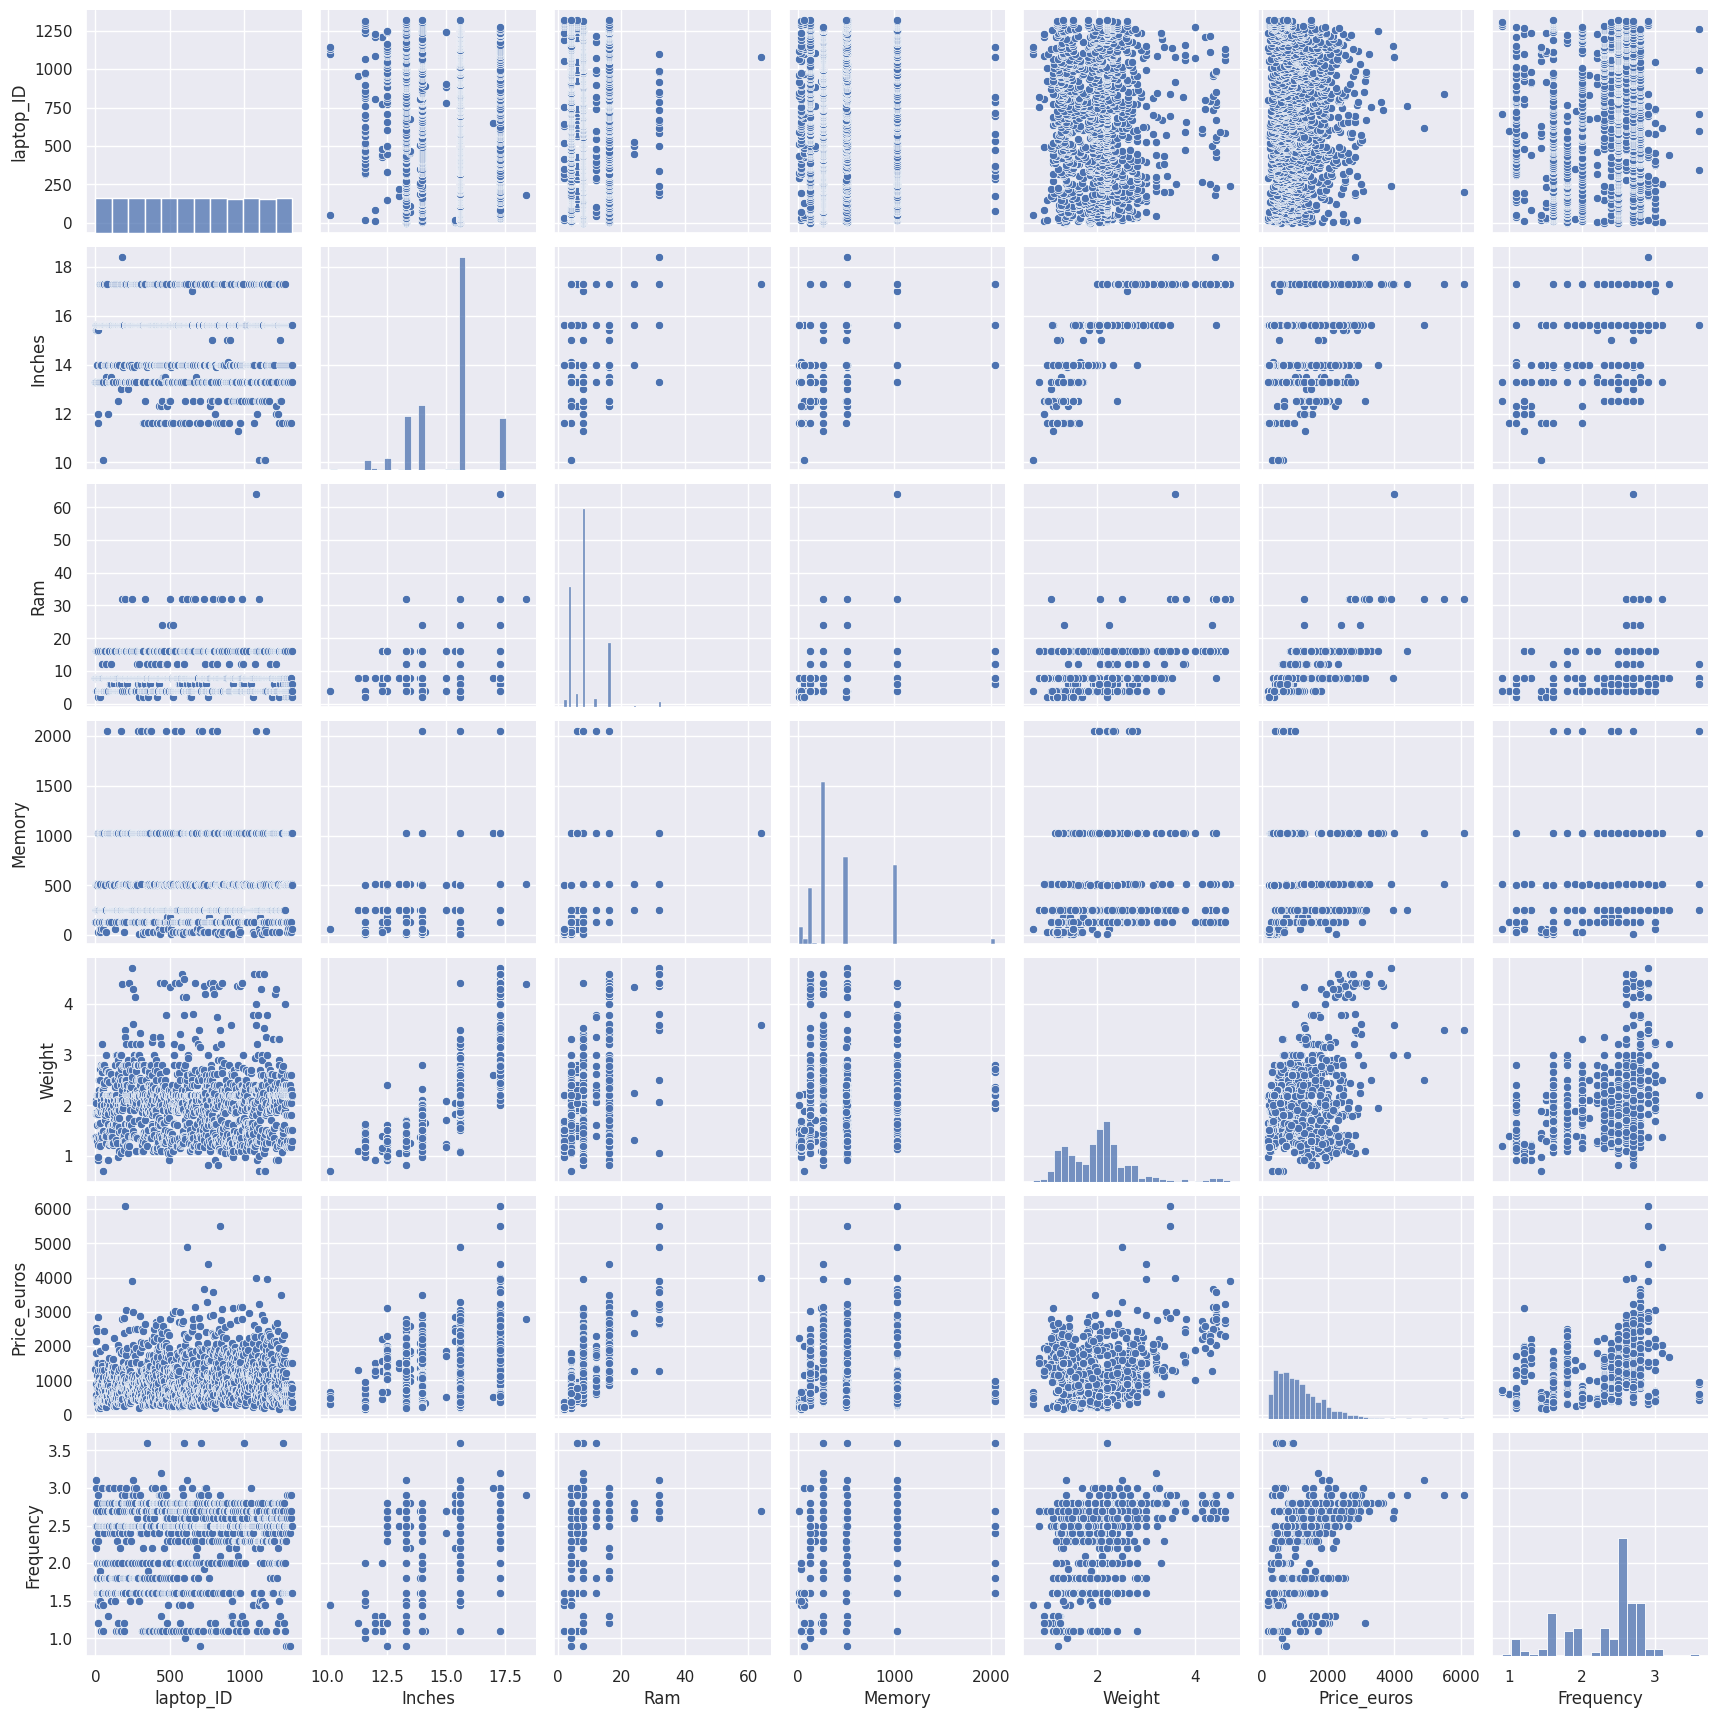

In [311]:
sns.pairplot(data)

<AxesSubplot: >

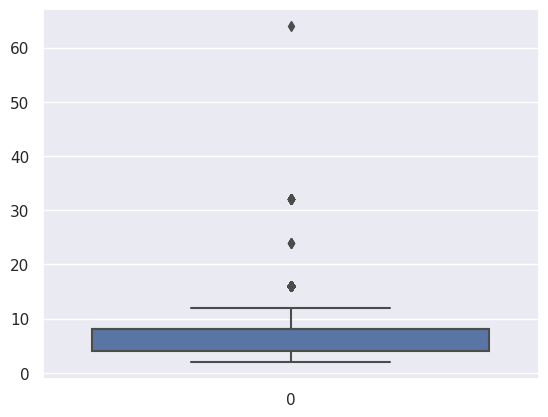

In [326]:

# data.plot(kind='box')
sns.boxplot(data["Ram"])

In [318]:
Q1_price = data['Price_euros'].quantile(0.25)
Q3_price = data['Price_euros'].quantile(0.75)
IQR_price = Q3_price - Q1_price
print(data[(data['Price_euros'] >= Q1_price - 1.5 * IQR_price) & (data['Price_euros'] >= Q3_price + 1.5 * IQR_price)])

      laptop_ID Company             Product            TypeName  Inches  Ram  \
17           18   Apple         MacBook Pro           Ultrabook    15.4   16   
190         194  Lenovo       Thinkpad Yoga  2 in 1 Convertible    14.0   16   
196         200   Razer           Blade Pro              Gaming    17.3   32   
204         208    Dell      Precision 7520         Workstation    15.6   16   
238         243    Asus   ROG G703VI-E5062T              Gaming    17.3   32   
247         252    Asus  Rog G701VIK-BA060T              Gaming    17.3   16   
297         302    Dell      Precision 7720         Workstation    17.3   16   
517         524    Asus        ROG Zephyrus              Gaming    15.6   24   
530         537    Dell        Alienware 17              Gaming    17.3   16   
563         570  Lenovo        Thinkpad P71            Notebook    17.3    8   
610         617  Lenovo        Thinkpad P51            Notebook    15.6   32   
659         667    Dell        Alienware

In [317]:
Q1_memory = data['Memory'].quantile(0.25)
Q3_memory = data['Memory'].quantile(0.75)
IQR_memory = Q3_memory - Q1_memory
print(data[(data['Memory'] >= Q1_memory - 1.5 * IQR_memory) & (data['Memory'] >= Q3_memory + 1.5 * IQR_memory)])

      laptop_ID Company                              Product  TypeName  \
18           19  Lenovo                    IdeaPad 320-15IKB  Notebook   
25           26    Dell                        Inspiron 3567  Notebook   
29           30      HP                          ProBook 470  Notebook   
36           37    Acer                             Aspire 3  Notebook   
38           39      HP                               250 G6  Notebook   
...         ...     ...                                  ...       ...   
1290       1308    Dell                        Inspiron 3567  Notebook   
1293       1311  Lenovo                   IdeaPad Y700-15ISK  Notebook   
1294       1312      HP                  Pavilion 15-AW003nv  Notebook   
1295       1313    Dell                        Inspiron 3567  Notebook   
1301       1319      HP  15-AC110nv (i7-6500U/6GB/1TB/Radeon  Notebook   

      Inches  Ram  Memory                      Gpu       OpSys  Weight  \
18      15.6    8  1024.0     Nvidia 

<AxesSubplot: ylabel='Company'>

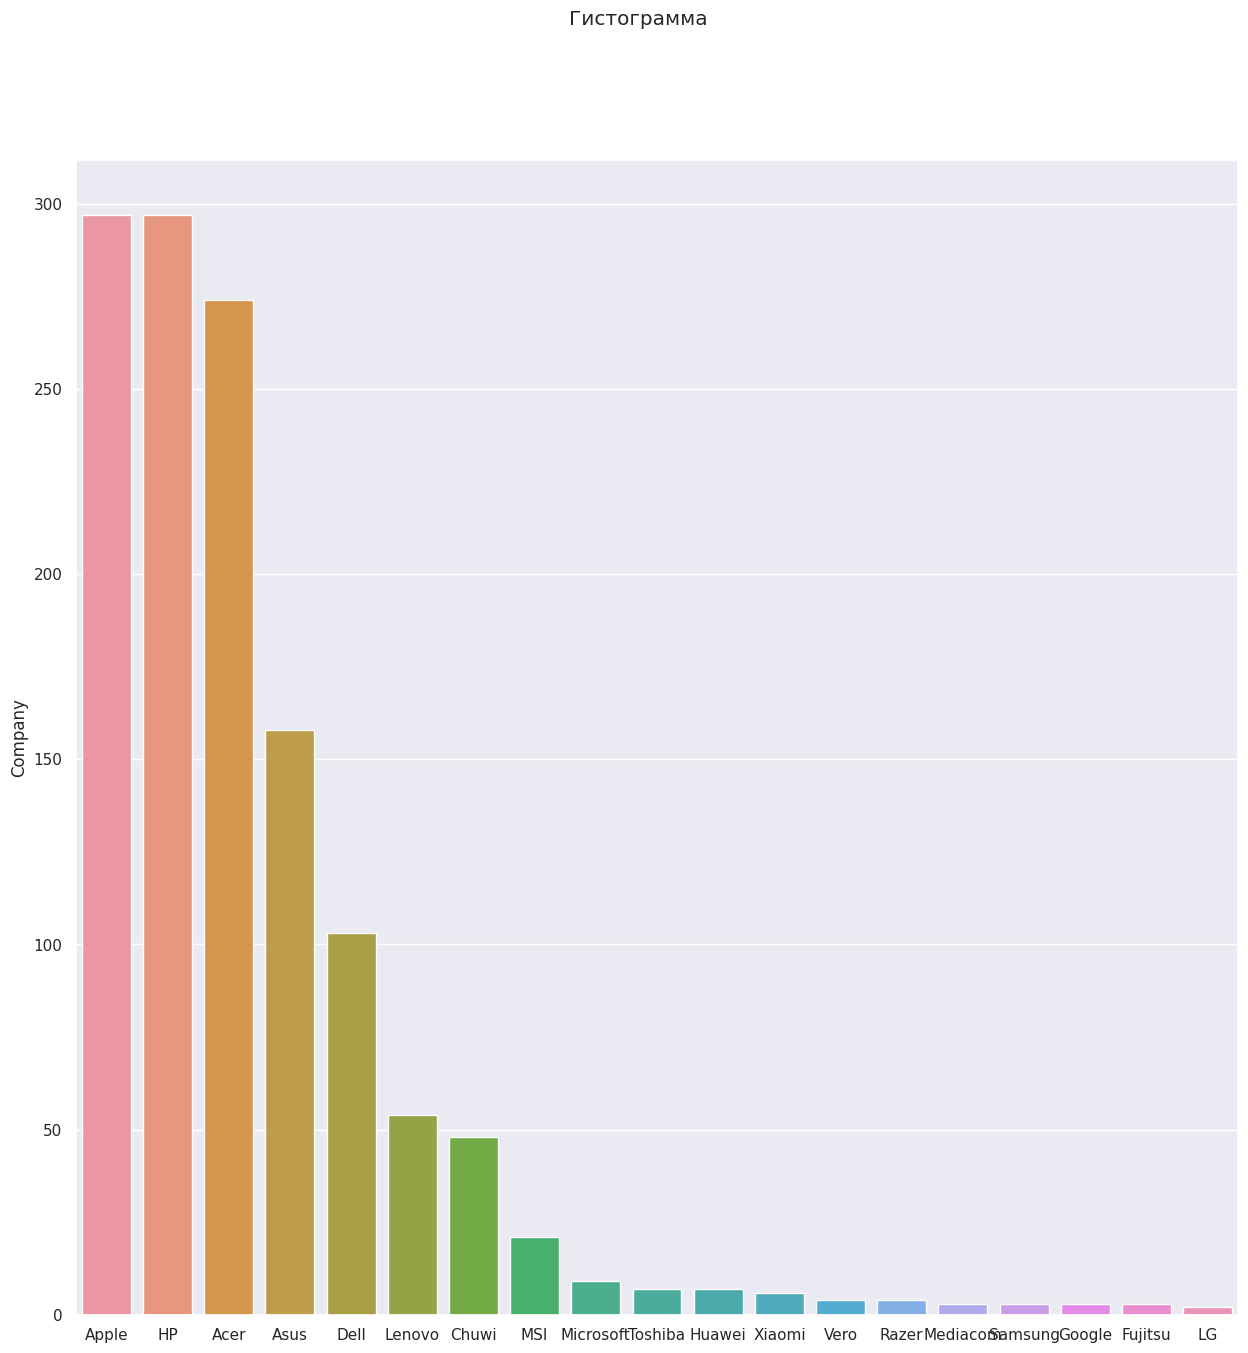

In [319]:
plt.figure(figsize=(15, 15)).suptitle('Гистограмма')
sns.barplot(x=data["Company"].unique(), y=data["Company"].value_counts())